# Price Prediction Of Apples Per Kilogram

## Introduction

The objective of this project is to **construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost given certain features.** Different algorithms such as **nultiple linear regression, decision trees, support vector machines and random forests** will be trained and evaluated on the Root Mean Squared Error **(RMSE)** to select the best performing algorithm.

In [1]:
# Import libraries we need to work with
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Load the data as a Pandas DataFrame
df_train = pd.read_csv('df-train_set.csv') # remember to push the dataset folder to git and update your path to a git one
df_test = pd.read_csv('df-test_set.csv')

## Exploring & understanding the data

In [3]:
# view the top 5 rows of the training data
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [4]:
# Get the number of rows and columns of the data
df_train.shape

(64376, 13)

The data contains **64376 rows** along with **13 features.**

In [5]:
# Get a quick description of the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


Looking at our columns we can see the number and datatypes of features we are working with. The list of **features** we have are:
- Province    (categorical)
- Container   (categorical)
- Size_Grade  (categorical)
- Weight_Kg
- Commodities (categorical)
- Date        (interval)
- Low_Price
- High_Price
- Sales_Total
- Total_Qty_Sold
- Total_Kg_Sold
- Stock_On_Hand
- avg_price_per_kg

There are **no null values** in the dataset and there are **5 non numeric values.**

In [6]:
# Summary of numerical attributes in train data set
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


In [7]:
# Determine the skewness of data i.e how spread symmetrical the data is
df_train.skew()

Weight_Kg           10.746241
Low_Price           10.071797
High_Price           9.519075
Sales_Total          7.372393
Total_Qty_Sold       9.448153
Total_Kg_Sold        7.171355
Stock_On_Hand       13.767932
avg_price_per_kg          NaN
dtype: float64

Since the skew values of all the numerical columns (except for avg_price_per_kg) are greater than 1, the columns  are **skewed to the right.**

In [8]:
# Determine the kurtosis of the data i.e the measure of outliers present in the data
df_train.kurtosis()

Weight_Kg           116.022033
Low_Price           123.977754
High_Price          109.763276
Sales_Total          89.378966
Total_Qty_Sold      152.646835
Total_Kg_Sold        83.222862
Stock_On_Hand       437.075702
avg_price_per_kg           NaN
dtype: float64

Since the kurtosis values of all the numerical columns (except for avg_price_per_kg) are greater than 3, the columns  have a **large number of outliers.**

In [9]:
# Check for correlations between variables using the standard correlation coeffecient Pearson's r
df_train.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.832214,0.846184,0.007710,-0.055573,0.032639,-0.039879,-0.054991
Low_Price,0.832214,1.000000,0.962504,-0.006438,-0.093333,-0.031281,-0.062260,0.124585
High_Price,0.846184,0.962504,1.000000,0.029433,-0.082580,-0.000889,-0.046742,0.123440
Sales_Total,0.007710,-0.006438,0.029433,1.000000,0.750116,0.920337,0.265030,-0.000303
Total_Qty_Sold,-0.055573,-0.093333,-0.082580,0.750116,1.000000,0.735714,0.347718,-0.037589
Total_Kg_Sold,0.032639,-0.031281,-0.000889,0.920337,0.735714,1.000000,0.236541,-0.077350
Stock_On_Hand,-0.039879,-0.062260,-0.046742,0.265030,0.347718,0.236541,1.000000,-0.025811
avg_price_per_kg,-0.054991,0.124585,0.123440,-0.000303,-0.037589,-0.077350,-0.025811,1.000000


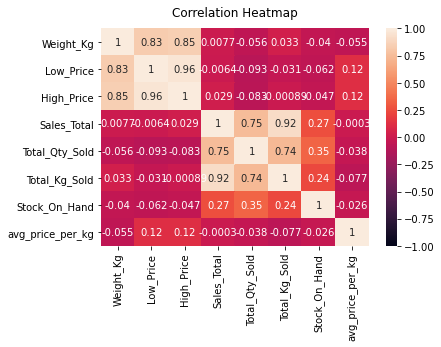

In [10]:
# Representing a graphical relationship between features using a heatmap
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [11]:
# Check how much each value correlates with the avg_price_per_kg
# using the standard correlation coefficient i.e Pearson's r 
corr_matrix = df_train.corr()
corr_matrix['avg_price_per_kg'].sort_values(ascending = False)

avg_price_per_kg    1.000000
Low_Price           0.124585
High_Price          0.123440
Sales_Total        -0.000303
Stock_On_Hand      -0.025811
Total_Qty_Sold     -0.037589
Weight_Kg          -0.054991
Total_Kg_Sold      -0.077350
Name: avg_price_per_kg, dtype: float64

Using the standard correlation (Pearson's r) we observe that : 
- there is a weak **positive correlation** between **Low_Price** and   **avg_price_per_kg** as well as **High_Price** and **avg_price_per_kg.** 
- there is a **weak negative correlation** between the **Sales_Total** and **avg_price_per_kg**

## Data cleaning / preparation

#### Functions to clean data

In [12]:
def count_inf_values(df,column_name):
    ''' Takes in a data frame and a column name as input.
        Returns the number of inf values in the column'''
    
    count_inf = np.isinf(df[column_name]).values.sum() # count number of inf values
    
    return count_inf

In [13]:
def replace_inf_values(df,column_name):
    
    ''' This function takes in a data frame and a column name as input.
    It replaces infinity values in the specified column with the median
    of that column. Returns the modified dataframe. '''

    median = df_train[column_name].median()
    #replace inf values with the median
    df[column_name] = df[column_name].replace([np.inf,-np.inf],median)
    
    return df

In [14]:
def split_date(df, date = 'Date'):
    
    ''' Takes in a data frame. Splits the Date column into integer values of Year,
        Month and Day. Returns modified dataframe with the Year,Month and Day
        columns added and the original Date column removed'''
        
    date_split = df[date].str.split('-')
    year = []
    month = []
    day = []
    #build the year, month, day lists
    for i in range(len(date_split)):
        year.append(int(date_split[i][0]))
        month.append(int(date_split[i][1]))
        day.append(int(date_split[i][2]))
            
    #create a new columns (year,month,day) in the dataframe
    df['Year'] = year
    df['Month'] = month
    df['Day'] = day

    #drop the date column
    df = df.drop([date],axis=1)
        
    return df


#### Cleaning the train set

##### Data cleaning with the Date column transformed to integer values of Year, Month, Day

In [15]:
# count the number of infinity values in the train set
count_inf = count_inf_values(df_train,'avg_price_per_kg')
count_inf

8

As can be seen from the above, the column **avg_price_per_kg** contains **8 infinity values.** We shall replace infinity values with the **median.**

In [16]:
# Replace inf values with the median
df_train = replace_inf_values(df_train,'avg_price_per_kg')

In [17]:
# Transform the date column
df_train_c = df_train.copy() #create a copy of the train dataframe
df_train_c = split_date(df_train_c)

In [18]:
# Filter the data by Apple Golden Delicious
df_train_c = df_train_c[df_train_c['Commodities'] == 'APPLE GOLDEN DELICIOUS']

#### Cleaning the test set

##### Data cleaning with the Date column transformed to integer values of Year, Month, Day

In [19]:
df_test_c = df_test.copy()
df_test_c = split_date(df_test_c)

In [20]:
df_test_c = df_test_c[df_test_c['Commodities'] == 'APPLE GOLDEN DELICIOUS']

## Feature Selection

#### Feature selection with Date column not transformed 

In [21]:
# filtering for all columns
df_train_all = df_train.copy()
df_train_all = df_train_all[df_train_all['Commodities'] == 'APPLE GOLDEN DELICIOUS']
df_train_all = df_train_all.drop(['Commodities'],axis=1)
df_train_all.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [22]:
# Dummy variable encoding
df_train_dummies_all = pd.get_dummies(df_train_all)

#place dependent variable to last column
column_names = [col for col in df_train_dummies_all.columns if col != 'avg_price_per_kg'] + ['avg_price_per_kg']

df_train_dummies_all = df_train_dummies_all.reindex(columns = column_names)
df_train_dummies_all.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_CAPE,Province_EASTERN CAPE,Province_NATAL,...,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,1,0,0,...,1,0,0,0,0,0,0,0,0,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4.55
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,...,0,0,0,0,0,0,0,0,0,6.11
40,18.3,80.0,120.0,32020.0,388,7100.4,443,1,0,0,...,0,0,0,0,0,0,0,0,0,4.51
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,0,1,0,...,0,0,0,0,0,0,1,0,0,4.50


##### Scaling and removing outliers with Date column not transformed

In [23]:
x_scale = df_train_dummies_all.drop('avg_price_per_kg', axis=1)
y_scale = df_train_dummies_all['avg_price_per_kg']

In [24]:
# create scaler object
scaler = StandardScaler()

In [25]:
# create scaled version of the predictors (there is no need to scale the response)
X_train_scaled = scaler.fit_transform(x_scale)

In [26]:
# convert the scaled predictor values into a dataframe
x_train_standardise = pd.DataFrame(X_train_scaled,columns=x_scale.columns)
x_train_standardise.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_CAPE,Province_EASTERN CAPE,Province_NATAL,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
0,-0.222433,-0.065087,-0.105317,0.811807,0.510117,0.511073,0.571070,0.931634,-0.343488,-0.245547,...,-0.081881,11.765567,-0.075281,-0.078648,-0.06415,-0.088,-0.099143,-0.084994,-0.099143,-0.075281
1,-0.295704,-0.332855,-0.382175,-0.103950,0.471248,0.091837,-0.563874,0.931634,-0.343488,-0.245547,...,-0.081881,-0.084994,-0.075281,-0.078648,-0.06415,-0.088,-0.099143,-0.084994,-0.099143,-0.075281
2,-0.315779,-0.319467,-0.370639,-0.488870,-0.506948,-0.459029,1.515476,-1.073382,-0.343488,-0.245547,...,-0.081881,-0.084994,-0.075281,-0.078648,-0.06415,-0.088,-0.099143,-0.084994,-0.099143,-0.075281
3,-0.222433,-0.252525,-0.220674,0.306871,0.691504,0.679187,0.047781,0.931634,-0.343488,-0.245547,...,-0.081881,-0.084994,-0.075281,-0.078648,-0.06415,-0.088,-0.099143,-0.084994,-0.099143,-0.075281
4,3.608756,4.353082,3.655338,-0.468098,-0.562012,-0.419986,-0.561112,-1.073382,2.911310,-0.245547,...,-0.081881,-0.084994,-0.075281,-0.078648,-0.06415,-0.088,-0.099143,11.765567,-0.099143,-0.075281


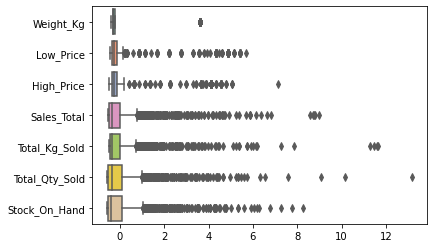

In [27]:
# Visualizing the standardized data
f = x_train_standardise[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Kg_Sold', 'Total_Qty_Sold', 'Stock_On_Hand']] 
sns.boxplot(data=f, orient='h', palette='Set2');

<AxesSubplot:>

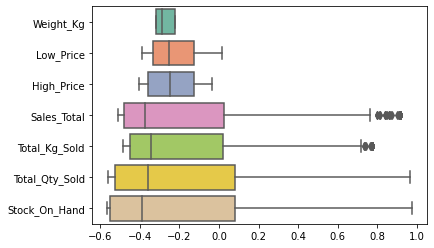

In [28]:
# Removing outliers
df_out = x_train_standardise.copy()
for col in df_out.columns:
    if df_out[col].dtype == np.dtype('int64') or df_out[col].dtype == np.dtype('float64'):
        df_out[col] = np.where(df_out[col] <df_out[col].quantile(0.05), np.quantile(df_out[col], 0.05),df_out[col])
        df_out[col] = np.where(df_out[col] >df_out[col].quantile(0.90), np.quantile(df_out[col], 0.90),df_out[col])
f1 = df_out[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Kg_Sold', 'Total_Qty_Sold', 'Stock_On_Hand']] 
sns.boxplot(data=f1, orient='h', palette='Set2') 

#### Feature selection with Date column transformed

In [29]:
# Dummy variable encoding for train set
df_train_dummies = pd.get_dummies(df_train_c,drop_first = True)

#place dependent variable to last column
column_names = [col for col in df_train_dummies.columns if col != 'avg_price_per_kg'] + ['avg_price_per_kg']

df_train_dummies = df_train_dummies.reindex(columns = column_names)
df_train_dummies.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Year,Month,Day,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,2020,9,9,...,0,0,0,0,0,0,0,0,0,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,2020,4,14,...,0,0,0,0,0,1,0,0,0,4.55
24,9.0,55.0,55.0,990.0,18,162.0,1506,2020,4,16,...,0,0,0,0,0,0,1,0,0,6.11
40,18.3,80.0,120.0,32020.0,388,7100.4,443,2020,5,4,...,0,1,0,0,0,0,0,0,0,4.51
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,2020,9,28,...,0,1,0,0,0,0,0,0,0,4.50


After variable encoding, there is a **total** of **36 features** 

In [30]:
# Dummy variable encoding for test set
df_test_dummies = pd.get_dummies(df_test_c,drop_first = True)

#### Variable selection by Correlation and Significance

In [31]:
# Check how much each value correlates with the avg_price_per_kg
# using the standard correlation coefficient i.e Pearson's r 
corr = df_train_dummies.corr()['avg_price_per_kg'].sort_values(ascending = False)
corr

avg_price_per_kg                 1.000000
Container_M4183                  0.403229
Province_W.CAPE-BERGRIVER ETC    0.262051
Size_Grade_1X                    0.251451
Container_EC120                  0.188162
Size_Grade_1M                    0.175779
Container_EF120                  0.114297
Sales_Total                      0.108473
Stock_On_Hand                    0.105028
Total_Qty_Sold                   0.087536
Container_EG140                  0.023753
Container_M6125                  0.007568
Month                            0.005205
Container_M9125                  0.002812
Total_Kg_Sold                   -0.001007
Province_TRANSVAAL              -0.020415
Province_ORANGE FREE STATE      -0.025026
Province_WEST COAST             -0.025122
Size_Grade_1U                   -0.027335
Size_Grade_1S                   -0.028506
Size_Grade_2X                   -0.051624
Container_DT063                 -0.059579
Size_Grade_2U                   -0.069457
Day                             -0

In [32]:
# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

columns_ = [col for col in corr.index if col != 'avg_price_per_kg']

for col in columns_:
    p_val = round(pearsonr(df_train_dummies[col], df_train_dummies['avg_price_per_kg'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corr[col],
                    'P_Value':p_val}   

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')

# For a 5% signifance value, we can infer that the below features are significant
significant_features = df_cp_sorted[df_cp_sorted['P_Value']<0.05]
significant_features

,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.000000
Size_Grade_2S,-0.352996,0.000000
Weight_Kg,-0.337886,0.000000
Container_JE090,-0.322235,0.000000
Province_EASTERN CAPE,-0.178531,0.000000
High_Price,-0.164496,0.000000
Size_Grade_2M,-0.153372,0.000000
Low_Price,-0.141740,0.000000
Container_JG110,-0.140148,0.000000
Year,-0.135526,0.000000


For a logic test with a **signifance value of 5%**, we can infer that the below features are statistically significant: 
- Container_M4183 	
- Size_Grade_2S 	
- Weight_Kg 	
- Container_JE090 	
- Province_EASTERN CAPE 	
- High_Price 
- Size_Grade_2M 	
- Low_Price 	
- Container_JG110 	
- Year 	 
- Container_IA400 	
- Province_NATAL 	
- Province_W.CAPE-BERGRIVER ETC 	
- Size_Grade_1X 	
- Container_EC120 	
- Size_Grade_1M 
- Container_EF120
- Sales_Total 	
- Stock_On_Hand 	
- Size_Grade_2L 
- Total_Qty_Sold 	
- Day 	
- Size_Grade_2U 	
- Container_DT063 	
- Size_Grade_2X

## Training the models

#### Training a Multiple Regression model with outliers and with Date column not transformed

In [33]:
x = df_train_dummies_all.drop(['avg_price_per_kg'],axis=1)
y = df_train_dummies_all['avg_price_per_kg']

In [34]:
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
# create model object
lm = LinearRegression()

In [36]:
lm.fit(x_train,y_train)

LinearRegression()

In [37]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [38]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])

In [39]:
print("Intercept:", beta_0)

Intercept: 6.049505373274032


In [40]:
beta_js

,Coefficient
Weight_Kg,-0.013002
Low_Price,0.000009
High_Price,0.001451
Sales_Total,0.000058
Total_Qty_Sold,-0.002073
...,...
Date_2020-09-21,0.945847
Date_2020-09-23,0.386276
Date_2020-09-28,-0.014228
Date_2020-10-01,0.407767


#### Predictions on the train data set

In [41]:
# get predictions for train data
y_pred_tr = lm.predict(x_train)

# calculate MSE
MSE = mean_squared_error(y_pred_tr,y_train)

# Report RMSE
print("Multiple Regression model RMSE is:",np.sqrt(MSE))

Multiple Regression model RMSE is: 1.2139989096502701


#### Predictions on the test data set

In [42]:
# get predictions for test data
y_pred_te = lm.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_pred_te,y_test)

# Report RMSE
print("Multiple Regression model RMSE is:",np.sqrt(MSE))

Multiple Regression model RMSE is: 1.4105711751803909


#### Training a multiple linear regression model without outliers and with Date column not transformed

In [43]:
x = df_out
y = df_train_dummies['avg_price_per_kg']

In [44]:
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
# create model object
lm = LinearRegression()

In [46]:
lm.fit(x_train,y_train)

LinearRegression()

In [47]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [48]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])

In [49]:
print("Intercept:", beta_0)

Intercept: 4522435496552.656


#### Predictions on the train data set

In [50]:
# get predictions for train data
y_pred_tr = lm.predict(x_train)

# calculate MSE
MSE = mean_squared_error(y_pred_tr,y_train)

# Report RMSE
print("Multiple Regression model RMSE is:",np.sqrt(MSE))

Multiple Regression model RMSE is: 0.9772099836079946


#### Predictions on the test data set

In [51]:
# get predictions for test data
y_pred_te = lm.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_pred_te,y_test)

# Report RMSE
print("Multiple Regression model RMSE is:",np.sqrt(MSE))

Multiple Regression model RMSE is: 0.901465520383787


#### Training a Multiple Regression model with outliers and all columns with the Date feature transformed

In [52]:
x = df_train_dummies.drop(['avg_price_per_kg'],axis=1)
y = df_train_dummies['avg_price_per_kg']

In [53]:
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
# create model object
lm = LinearRegression()

In [55]:
lm.fit(x_train,y_train)

LinearRegression()

In [56]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [57]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])

In [58]:
print("Intercept:", beta_0)

Intercept: -15888577.610581508


In [59]:
beta_js

,Coefficient
Weight_Kg,5.297164e+06
Low_Price,7.787863e-05
High_Price,1.841532e-03
Sales_Total,7.220452e-05
Total_Qty_Sold,-2.261687e-03
Total_Kg_Sold,-3.720341e-04
Stock_On_Hand,-1.337213e-04
Year,-1.439365e+00
Month,1.624324e-02
Day,-8.276159e-03


#### Visualize the trained data

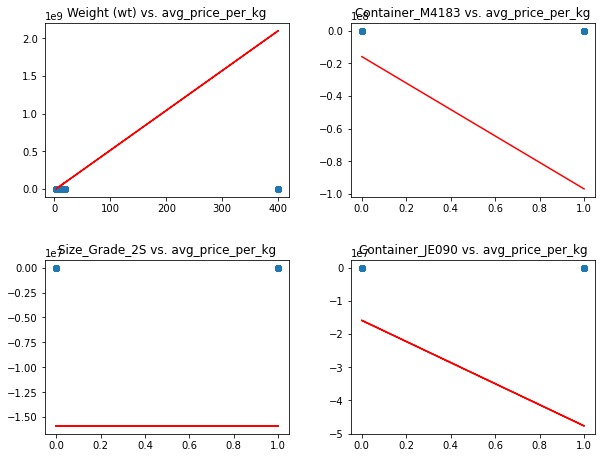

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))

axs[0,0].scatter(df_train_dummies['Weight_Kg'], df_train_dummies['avg_price_per_kg'])
axs[0,0].plot(df_train_dummies['Weight_Kg'], lm.intercept_ + lm.coef_[0]*df_train_dummies['Weight_Kg'], color='red')
axs[0,0].title.set_text('Weight (wt) vs. avg_price_per_kg')

axs[0,1].scatter(df_train_dummies['Container_M4183'], df_train_dummies['avg_price_per_kg'])
axs[0,1].plot(df_train_dummies['Container_M4183'], lm.intercept_ + lm.coef_[23]*df_train_dummies['Container_M4183'], color='red')
axs[0,1].title.set_text('Container_M4183 vs. avg_price_per_kg')

axs[1,0].scatter(df_train_dummies['Size_Grade_2S'], df_train_dummies['avg_price_per_kg'])
axs[1,0].plot(df_train_dummies['Size_Grade_2S'], lm.intercept_ + lm.coef_[32]*df_train_dummies['Size_Grade_2S'], color='red')
axs[1,0].title.set_text('Size_Grade_2S vs. avg_price_per_kg')

axs[1,1].scatter(df_train_dummies['Container_JE090'], df_train_dummies['avg_price_per_kg'])
axs[1,1].plot(df_train_dummies['Container_JE090'], lm.intercept_ + lm.coef_[21]*df_train_dummies['Container_JE090'], color='red')
axs[1,1].title.set_text('Container_JE090 vs. avg_price_per_kg')

fig.tight_layout(pad=3.0)

plt.show()

#### Predictions on the train data set

In [61]:
# get predictions for train data
y_pred_tr = lm.predict(x_train)

# calculate MSE
MSE = mean_squared_error(y_pred_tr,y_train)

# Report RMSE
print("Multiple Regression model RMSE is:",np.sqrt(MSE))

Multiple Regression model RMSE is: 1.36848206566025


#### Predictions on the test data set

In [62]:
# get predictions for test data
y_pred_te = lm.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_pred_te,y_test)

# Report RMSE
print("Multiple Regression model RMSE is:",np.sqrt(MSE))

Multiple Regression model RMSE is: 1.4096624270084281


From the above we can observe that the model does poorly when the date feature is transformed,producing an **RMSE** of **1.4096624270084281** on the **test set** but does better when the date feature is not transformed producing an **RMSE** of  **0.901465520383787** on the **test set.**

#### Training a multiple linear regression model with statistically significant features with the Date column transformed.  (outliers included)

In [63]:
df_train_dummies_copy = df_train_dummies.copy() #make a copy of df train dummies
features = df_cp_sorted[df_cp_sorted['P_Value']<0.05].index
df_train_dummies_copy = df_train_dummies_copy.drop(['avg_price_per_kg'],axis=1)
#drop irrelevant features
irrelevant_features = [feature for feature in df_train_dummies_copy.columns if feature not in features ]
df_train_dummies_copy = df_train_dummies_copy.drop(irrelevant_features,axis=1)


df_train_dummies_copy.shape

(1952, 25)

In [64]:
x = df_train_dummies_copy
y = df_train_dummies['avg_price_per_kg']

In [65]:
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
# Instantiate regression tree model
lm = LinearRegression()

In [67]:
lm.fit(x_train,y_train)

LinearRegression()

In [68]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [69]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])

In [70]:
print("Intercept:", beta_0)

Intercept: 3080.134181531915


In [71]:
beta_js

,Coefficient
Weight_Kg,0.144116
Low_Price,0.000863
High_Price,0.001262
Sales_Total,0.000007
Total_Qty_Sold,-0.000870
Stock_On_Hand,-0.000134
Year,-1.522052
Day,-0.009096
Province_EASTERN CAPE,-1.473784
Province_NATAL,-1.899272


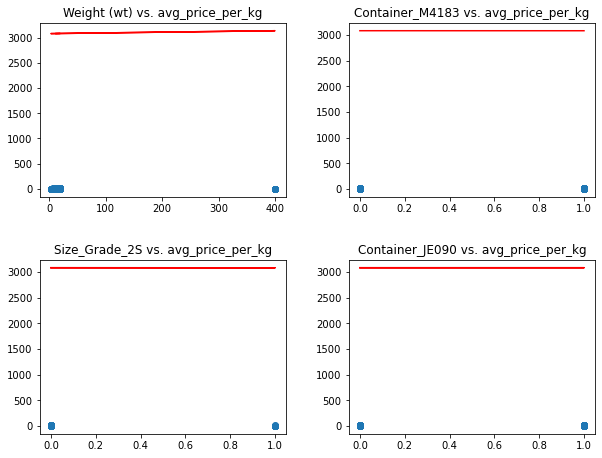

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))

axs[0,0].scatter(df_train_dummies['Weight_Kg'], df_train_dummies['avg_price_per_kg'])
axs[0,0].plot(df_train_dummies['Weight_Kg'], lm.intercept_ + lm.coef_[0]*df_train_dummies['Weight_Kg'], color='red')
axs[0,0].title.set_text('Weight (wt) vs. avg_price_per_kg')

axs[0,1].scatter(df_train_dummies['Container_M4183'], df_train_dummies['avg_price_per_kg'])
axs[0,1].plot(df_train_dummies['Container_M4183'], lm.intercept_ + lm.coef_[17]*df_train_dummies['Container_M4183'], color='red')
axs[0,1].title.set_text('Container_M4183 vs. avg_price_per_kg')

axs[1,0].scatter(df_train_dummies['Size_Grade_2S'], df_train_dummies['avg_price_per_kg'])
axs[1,0].plot(df_train_dummies['Size_Grade_2S'], lm.intercept_ + lm.coef_[22]*df_train_dummies['Size_Grade_2S'], color='red')
axs[1,0].title.set_text('Size_Grade_2S vs. avg_price_per_kg')

axs[1,1].scatter(df_train_dummies['Container_JE090'], df_train_dummies['avg_price_per_kg'])
axs[1,1].plot(df_train_dummies['Container_JE090'], lm.intercept_ + lm.coef_[15]*df_train_dummies['Container_JE090'], color='red')
axs[1,1].title.set_text('Container_JE090 vs. avg_price_per_kg')

fig.tight_layout(pad=3.0)

plt.show()

#### Predictions on the train data set

In [73]:
# get predictions for train data
y_pred_tr = lm.predict(x_train)

# calculate MSE
MSE = mean_squared_error(y_pred_tr,y_train)

# Report RMSE
print("Multiple Linear Regression model RMSE is:",np.sqrt(MSE))

Multiple Linear Regression model RMSE is: 1.4694518398087517


#### Predictions on the test data set

In [74]:
# get predictions for test data
y_pred = lm.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_pred,y_test)

# Report RMSE
print("Multiple Linear Regression model RMSE is:",np.sqrt(MSE))

Multiple Linear Regression model RMSE is: 1.4904685903658703


From the above we note that even though we used **significant features**, the model does **not improve**. The **RMSE** on the test is **1.4904685903658585** using statistically significant features compared to using **all features** which gave an **RMSE** of **0.901465520383787**.

#### Training a decision tree model with outliers and all features

In [75]:
x = df_train_dummies.drop(['avg_price_per_kg'],axis=1)
y = df_train_dummies['avg_price_per_kg']

In [76]:
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=6,random_state=42)

In [78]:
regr_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

#### Predictions on the train data set

In [79]:
# get predictions for train data
y_pred_tr = regr_tree.predict(x_train)

# calculate MSE
MSE = mean_squared_error(y_pred_tr,y_train)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE))

Regression Decision Tree model RMSE is: 0.6892033230904288


#### Predictions on the train data set

In [80]:
# get predictions for test data
y_pred_te = regr_tree.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_pred_te,y_test)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE))

Regression Decision Tree model RMSE is: 0.8373910720698639


From the above observation we noticed the following:
- At the **depth of 4** the **RMSE** on the **train** is **1.040204462525701** and on the **test** it is **1.0852530959077327**

- At a **depth of 5** the **RMSE** on the **train** is **0.8626536545858563** and on the **test** it is **0.9159025722249604**

- At a **depth of 10** the **RMSE** on the **train** is **0.2471846820865578** and on the **test** it is **0.759714727617998.** The model overfits the training data very badly.
- Based on the above we shall use a **depth of 6** for the model since it yields an **RMSE** of **0.6892033230904288** on the train and **0.8373910720698639**

#### Training a decision tree model with statistically significant features (outliers included)

In [81]:
df_train_dummies_copy = df_train_dummies.copy() #make a copy of df train dummies
features = df_cp_sorted[df_cp_sorted['P_Value']<0.05].index

#drop the feature we are predicting
df_train_dummies_copy = df_train_dummies_copy.drop(['avg_price_per_kg'],axis=1)

#drop irrelevant features
irrelevant_features = [feature for feature in df_train_dummies_copy.columns if feature not in features ]
df_train_dummies_copy = df_train_dummies_copy.drop(irrelevant_features,axis=1)


df_train_dummies_copy.shape

(1952, 25)

In [82]:
x1 = df_train_dummies_copy
y1 = df_train_dummies['avg_price_per_kg']


In [83]:
# set test size to 20 % of training data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [84]:
# Instantiate regression tree model
regr_tree1 = DecisionTreeRegressor(max_depth=7,random_state=42)

In [85]:
regr_tree1.fit(x_train1,y_train1)

DecisionTreeRegressor(max_depth=7, random_state=42)

#### Predictions on the train data set

In [86]:
# get predictions for train data
y_pred_tr = regr_tree1.predict(x_train1)

# calculate MSE
MSE = mean_squared_error(y_pred_tr,y_train1)

# Report RMSE
print("Regression Decision Tree model RMSE train is:",np.sqrt(MSE))

Regression Decision Tree model RMSE train is: 0.5739768569705725


#### Predictions on the test data set

In [87]:
# get predictions for test data
y_pred_te = regr_tree1.predict(x_test1)

# calculate MSE
MSE = mean_squared_error(y_pred_te,y_test1)

# Report RMSE
print("Regression Decision Tree model RMSE test is:",np.sqrt(MSE))

Regression Decision Tree model RMSE test is: 0.7865164725040444


From the above we note that even though we used **significant features** which gave an **RMSE** of **0.7865164725040444,** the model's **improvement is very small** compared to the **RMSE** of **0.8373910720698639** when all features were used.

#### Training a support vector regressor with significant features

In [88]:
sv_reg = SVR(kernel = 'rbf', gamma = 'auto')

In [89]:
sv_reg.fit(x_train1,y_train1)

SVR(gamma='auto')

In [90]:
y_pred_te = sv_reg.predict(x_test1)

In [91]:
MSE = mean_squared_error(y_test1,y_pred_te)
print("support vector regressor model RMSE is:",np.sqrt(MSE))

support vector regressor model RMSE is: 2.0758433562384404


The **support vector regressor** performs very poorly resulting in an **RMSE score of 2.0758433562384404** when compare to a decision tree.

### Improving the models

#### Bagging - AKA Bootstrap Aggregating

In [92]:
# Instantiate BaggingRegressor model with a decision tree as the base model
bag_reg = BaggingRegressor(base_estimator = regr_tree1, random_state = 32)

In [93]:
bag_reg.fit(x_train1,y_train1)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=7,
                                                      random_state=42),
                 random_state=32)

#### Predictions on the train data set

In [94]:
# get predictions for train data
y_pred_tr = bag_reg.predict(x_train1)

# calculate MSE
MSE = mean_squared_error(y_pred_tr,y_train1)

# Report RMSE
print("Decision Tree Bagging model train RMSE is:",np.sqrt(MSE))

Decision Tree Bagging model train RMSE is: 0.5499235152169769


#### Predictions on the test data set

In [95]:
y_pred_te = bag_reg.predict(x_test1)
MSE = mean_squared_error(y_pred_te,y_test1)
# Report RMSE
print("Decision Tree Bagging model test RMSE is:",np.sqrt(MSE))

Decision Tree Bagging model test RMSE is: 0.5966288875878257


 From the above, Bagging ensemble method with base tree of depth 7 performed way better overall with an **RMSE** of  **0.5499235152169769** in the **train** and **0.5966288875878257** in the test when compared to decision trees without ensemble methods as well as support vectore machines.

#### Boosting

In [96]:
# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_reg = AdaBoostRegressor(base_estimator = regr_tree1,random_state=42)

In [97]:
bst_reg.fit(x_train1,y_train1)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=7,
                                                       random_state=42),
                  random_state=42)

#### Predictions on the train data set

In [98]:
# get predictions for train data
y_pred_tr = bst_reg.predict(x_train1)

# calculate MSE
MSE = mean_squared_error(y_pred_tr,y_train1)

# Report RMSE
print("Decision Tree boosting model RMSE train is:",np.sqrt(MSE))

Decision Tree boosting model RMSE train is: 0.3201151602884885


#### Predictions on the test data set

In [99]:
y_pred_te = bst_reg.predict(x_test1)
# calculate MSE
MSE = mean_squared_error(y_pred_te,y_test1)

# Report RMSE
print("Decision Tree boosting model RMSE test is:",np.sqrt(MSE))

Decision Tree boosting model RMSE test is: 0.5735929585115709


 Boosting a decision tree with a depth 7 **overfits** the data quite badly even when the depth of the tree is tweeked, boosting still doesn't improve the decision tree.

### Random forests

In [100]:
# Our forest consists of 40 trees with a max depth of 7
RF = RandomForestRegressor(n_estimators=40, max_depth=7,random_state = 42)
RF.fit(x_train1,y_train1)

RandomForestRegressor(max_depth=7, n_estimators=40, random_state=42)

In [101]:
# Get predictions train
y_pred_tr = RF.predict(x_train1)

In [102]:
# Get predictions train
y_pred_tr = RF.predict(x_train1)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_train1,y_pred_tr)))

RMSE: 0.5424498425267354


In [103]:
y_pred_te = RF.predict(x_test1)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test1,y_pred_te)))

RMSE: 0.5926163447732669


#### Boosting a random forest

In [104]:
# Instantiate AdaBoostRegressor model with a random forest as the base model
bst_regr = AdaBoostRegressor(base_estimator = RF,random_state=42)
bst_regr.fit(x_train1,y_train1)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=7,
                                                       n_estimators=40,
                                                       random_state=42),
                  random_state=42)

In [105]:
y_pred_te = bst_regr.predict(x_test1)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test1,y_pred_te)))

RMSE: 0.5802424159832447


Boosting a random forest does not improve the RMSE score as expected since random forests are a type of emsemble method.

#### Bagging a random forest

In [106]:
# Instantiate BaggingRegressor model with a random forest as the base model
bag_regr = BaggingRegressor(base_estimator = RF,random_state = 42)
bag_regr.fit(x_train1,y_train1)

BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=7,
                                                      n_estimators=40,
                                                      random_state=42),
                 random_state=42)

In [107]:
y_pred_te = bag_regr.predict(x_test1)
MSE = mean_squared_error(y_pred_te,y_test1)
# Report RMSE
print("Decision Tree Bagging model test RMSE is:",np.sqrt(MSE))

Decision Tree Bagging model test RMSE is: 0.6197010276100098


Bagging a random forest also does not improve the RMSE score as expected since random forests are a type of emsemble method.

**Random forests** suprisingly **does not improve** the RMSE score in fact the score is similar to decison trees with ensemble methods.

### Making predictions with the external test set

In [108]:
#get predictions for the external test data
df_test_d=df_test_dummies.copy()
df_test_d=df_test_d.drop(['Index'],axis=1)
df_test_d=df_test_d.drop(irrelevant_features,axis = 1)
y_pred = bag_reg.predict(df_test_d)

In [109]:
# uploading to kaggle
submission = pd.DataFrame({'Index':df_test_dummies['Index'],'avg_price_per_kg':y_pred})
submission.head()

,Index,avg_price_per_kg
0,1,10.475012
1,2,11.671315
2,3,9.927898
3,4,8.667853
4,5,7.691182


In [110]:
file_name = 'decision_trees_final.csv'
submission.to_csv(file_name,index=False)

- **kaggle score for multiple linear regression:  0.79331**
- **kaggle score for decision trees with all columns (date column transformed) is: 0.73097**
- **kaggle score decision tree with significant features is: 0.72747**
- **kaggle score - bagging of a base decison tree with depth 6 is:  0.67898**
- **kaggle score for bagging of a base decison tree with depth 7 : 0.56659**

## Conclusion

Based on all the models we have trained (multiple linear regression,support vector machines, decision trees, random forests) we conclude that **decision trees with bagging** performed well overall hence this is our final model that we'll use in our API.